In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('anemia.csv')
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [6]:
df.shape

(1421, 6)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_12748\4091652558.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]])
c:\Users\KOREAVC\anaconda3\envs\prom\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_12748\4091652558.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wit

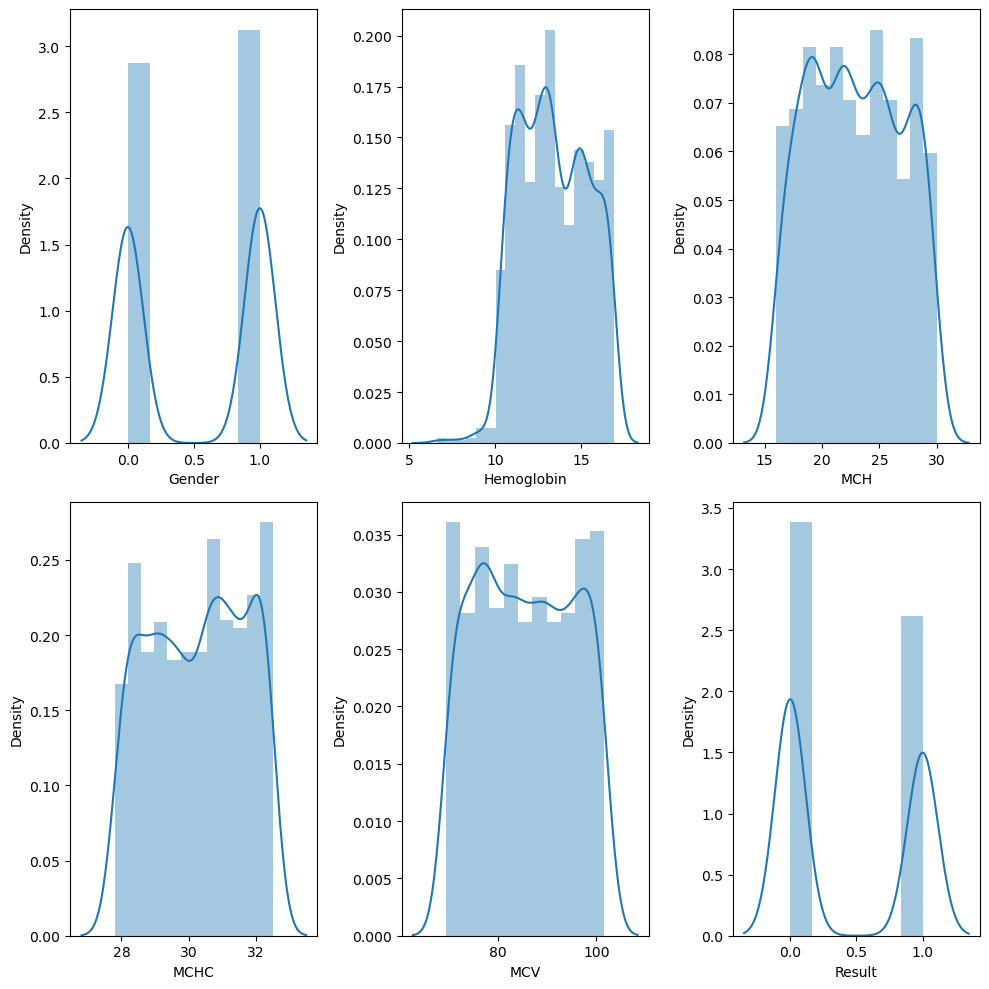

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
fig = plt.figure(1)
for i in range(len(df.columns)):
    ax = fig.add_subplot(2,3,i+1)
    sns.distplot(df[df.columns[i]])

plt.tight_layout()
plt.show()

In [8]:
target = df['Result']
data = df.drop(columns='Result',axis=1)
data

,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7
1419,0,14.3,16.2,29.5,95.2


In [9]:
data.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786
std,0.499745,1.974546,3.969375,1.400898,9.636701
min,0.000000,6.600000,16.000000,27.800000,69.400000
25%,0.000000,11.700000,19.400000,29.000000,77.300000
50%,1.000000,13.200000,22.700000,30.400000,85.300000
75%,1.000000,15.000000,26.200000,31.400000,94.200000
max,1.000000,16.900000,30.000000,32.500000,101.600000


In [10]:
corr = data.corr()
corr

,Gender,Hemoglobin,MCH,MCHC,MCV
Gender,1.000000,0.010972,0.001042,0.014574,-0.040447
Hemoglobin,0.010972,1.000000,0.014081,-0.042597,-0.025885
MCH,0.001042,0.014081,1.000000,0.018795,-0.015948
MCHC,0.014574,-0.042597,0.018795,1.000000,0.068450
MCV,-0.040447,-0.025885,-0.015948,0.068450,1.000000


In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target,random_state=42
)

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
train_scaled
test_scaled

array([[ 0.96402688, -0.34318322, -0.96426704, -0.32243844, -0.12301172],
       [-1.03731547,  0.71855322,  1.32358618,  0.39506457, -1.53225139],
       [ 0.96402688,  0.0612878 ,  1.19787996,  0.53856517, -0.84835566],
       ...,
       [ 0.96402688,  1.32525976, -0.7128546 ,  0.61031547,  1.0375386 ],
       [ 0.96402688, -1.15212527, -0.21002972, -0.60943964,  1.19296944],
       [-1.03731547, -0.14094771,  1.02189125,  1.54306938,  1.2758659 ]])

#### KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_scaled,train_target)
print(knn.score(train_scaled, train_target))
print(knn.score(test_scaled, test_target))

0.9849765258215962
0.9719101123595506


#### Ligistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9915492957746479
0.9915730337078652


#### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

1.0
1.0


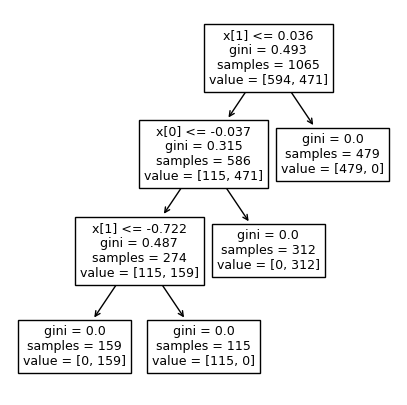

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(dt)
plt.show()